In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
base_dir = '/Users/jinseok/jupyter/투빅스/W02/로지스틱회귀분석/assignment1'
excel_file = 'sampled_data.csv'

excel_dir = os.path.join(base_dir, excel_file)

In [4]:
df = pd.read_csv( excel_dir, encoding = 'cp949')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


In [6]:
df['Class'].value_counts()

0    28428
1       52
Name: Class, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import * # matirx
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

## 1. 데이터 분할

In [8]:
# train, test 데이터 분할
# train 과 test = 8 : 2
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [9]:
# train, test 로 분할한 뒤 스케일링 진행
# 먼저 train
scaler = StandardScaler()
x_train_raw = scaler.fit_transform(train.drop('Class', axis=1))
x_train = pd.DataFrame(x_train_raw, columns = train.columns[:-1])
y_train = train.Class

In [10]:
# 다음 test
# 여기서는 x.train 으로 fit_transform 한 것으로 transform 해줘야함
x_test_raw = scaler.transform(test.drop('Class', axis=1))
x_test = pd.DataFrame(x_test_raw, columns = test.columns[:-1])
y_test = test.Class

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22784, 30), (5696, 30), (22784,), (5696,))

## 2. 로지스틱 회귀분석

In [1]:
# 로지스틱 회귀분석 생성
# train 데이터 적용
LR = LogisticRegression()
LR.fit(x_train, y_train)
print('학습용 데이터셋 정확도 : ', LR.score(x_train, y_train))

NameError: name 'LogisticRegression' is not defined

In [13]:
# train 데이터 fit 된 LR 모델에 x_test 데이터로 y 값 예측
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# 클래스(0,1) 를 구분한 각 확률값
LR.predict_proba(x_test)

array([[9.99843835e-01, 1.56165482e-04],
       [9.99468971e-01, 5.31028903e-04],
       [9.99965177e-01, 3.48231373e-05],
       ...,
       [9.99747261e-01, 2.52738812e-04],
       [9.99997762e-01, 2.23839306e-06],
       [9.99927406e-01, 7.25944502e-05]])

In [15]:
print('테스트용 데이터셋 정확도 : ', LR.score(x_test, y_test))

테스트용 데이터셋 정확도 :  0.9998244382022472


## 3. 분류 성능평가

In [16]:
# 실제 양성(1)을 양성이라고 예측 -> 5687
# 실제 음성(0)을 양성이라고 예측 -> 1
# 실제 음성을 음성이라고 예측 -> 8
confusion_matrix(y_test, y_pred)

array([[5687,    0],
       [   1,    8]])

   - 정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 수의 비율
   - 정밀도(precision) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율
   - 재현율(recall) : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율
   - F-score : 정밀도와 재현율의 가중조화평균(weight harmonic average)
    
   ###### 출처 : https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

In [17]:
# 실제 1인 데이터 중 89%가 1로 판별됨
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      5687
     class 1       1.00      0.89      0.94         9

    accuracy                           1.00      5696
   macro avg       1.00      0.94      0.97      5696
weighted avg       1.00      1.00      1.00      5696



In [18]:
# y 벡터, y_test 와 판별함수, x_test 를 대입

fpr, tpr, thresholds = roc_curve(y_test, LR.decision_function(x_test))
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.00105504, 0.00105504,
        0.43678565, 0.43713733, 1.        ]),
 array([0.        , 0.11111111, 0.88888889, 0.88888889, 1.        ,
        1.        , 1.        , 1.        ]),
 array([ 17.79265038,  16.79265038,   1.49357734,  -2.87887415,
         -2.99183232,  -8.79703693,  -8.79712401, -20.26126929]))

In [19]:
import matplotlib.pyplot as plt

In [20]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맥북이기에 애플고딕을 사용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

### feedback 
3) recall 계산 잘못하신 듯 합니다. confusion matrix에서 혼동이 있으셨던 것 같습니다. confusion matrix에서 (0,0)은 TN, (0,1)은 FP, (1,0)은 FN, (1,1)은 TP입니다. 이에 맞춰서 score를 다시 계산하셔야 할 것 같습니다.

A. 어떤 부분이 오류가 있는지 잘 모르겠습니다 ㅠㅠ 제가 참고한 사이트에서는 다음과 같이 나와있어서 참고하였습니다..
###### 출처 : https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

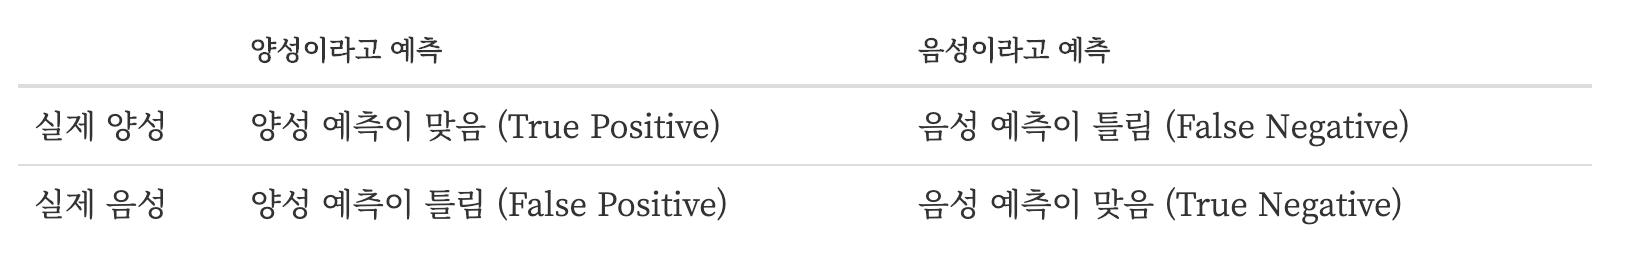

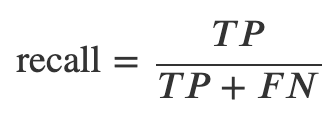

In [21]:
confusion_matrix(y_test, y_pred)

array([[5687,    0],
       [   1,    8]])

In [22]:
# 위양성율, fall-out : 실제 음성 데이터를 양성으로 분류한 비율
# 재현율, recall : 실제 양성 데이터를 양성으로 분류한 비율
fallout = 1 / (1+8) # 1 - fallout == 특이도(specificity)
recall = 5687 / (5687+0) # == 민감도(sensitivity)

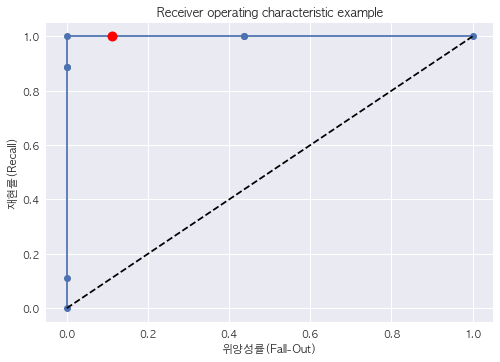

In [23]:
# curve 가 왼쪽 위 모서리에 가깝기 때문에 모델의 성능이 좋다고 평가할 수 있음
# fall-out 이 작고 y=x 그래프보다 상단에 위치해 있기 때문에 성능이 좋다고 평가할 수 있음
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [24]:
# 1에 매우 가까움
roc_auc_score(y_test, LR.decision_function(x_test)) # auc_score 계산

0.9998827735771643

In [25]:
# decision_function 으로 했기에 thresholds 값이 음수를 리턴하기도함
# 정확하게 이해하지는 못하겠음..
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
res

[[0.0, 0.0, 17.79265037640294],
 [0.0, 0.1111111111111111, 16.79265037640294],
 [0.0, 0.8888888888888888, 1.4935773423076206],
 [0.0010550378055213644, 0.8888888888888888, -2.878874145009492],
 [0.0010550378055213644, 1.0, -2.991832321933015],
 [0.4367856514858449, 1.0, -8.797036934004886],
 [0.437137330754352, 1.0, -8.797124008099265],
 [1.0, 1.0, -20.26126929408801]]

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:, 1])

In [27]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
res

[[0.0, 0.0, 1.9999999490616842],
 [0.0, 0.1111111111111111, 0.9999999490616841],
 [0.0, 0.8888888888888888, 0.8166146050631454],
 [0.0010550378055213644, 0.8888888888888888, 0.05320782479433907],
 [0.0010550378055213644, 1.0, 0.04779622854261025],
 [0.4367856514858449, 1.0, 0.00015115751744944713],
 [0.437137330754352, 1.0, 0.00015114435810778133],
 [1.0, 1.0, 1.5872398133839863e-09]]

In [28]:
# fpr 과 tpr 의 차가 가장 클 때의 threshold 는 0.9989...
# 이 threshold 를 사용하기에는 무리가 있어보임
temp = []
for i in range(len(res)):
    value = abs(res[i][0] - res[i][1])
    temp.append(value)
print(max(temp))

0.9989449621944786


In [29]:
# Class 의 비율이 너무 차이가 크기 때문에 데이터 비대칭 문제가 발생하는 것으로 보임

In [30]:
df['Class'].value_counts()

0    28428
1       52
Name: Class, dtype: int64

In [31]:
# RandomOverSampler 를 사용하여 오버샘플링 하여 해결하고자함
# 언더샘플링 하게 되면 test 개수가 너무 적게 부여됨
from imblearn.over_sampling import RandomOverSampler

In [37]:
df.columns[:31]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [38]:
X = df[df.columns[:30]]
y = df['Class']

In [39]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X, y)

In [40]:
df_samp = pd.concat((X_samp, y_samp), axis = 1)
df_samp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56851,139107,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
56852,131024,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1
56853,93888,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,...,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1.00,1
56854,41204,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1


In [41]:
# train, test 데이터 분할 (비율 8 : 2)
train, test = train_test_split(df_samp, test_size=0.2, random_state=0)

In [42]:
# train, test 로 분할한 뒤 스케일링 진행
# 먼저 train
scaler = StandardScaler()
x_train_raw = scaler.fit_transform(train.drop('Class', axis=1))
x_train = pd.DataFrame(x_train_raw, columns = train.columns[:-1])
y_train = train.Class

In [43]:
# 다음 test
# 여기서는 x.train 으로 fit_transform 한 것으로 transform 해줘야함
x_test_raw = scaler.transform(test.drop('Class', axis=1))
x_test = pd.DataFrame(x_test_raw, columns = test.columns[:-1])
y_test = test.Class

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45484, 30), (11372, 30), (45484,), (11372,))

In [46]:
# 로지스틱 회귀분석 생성
# train 데이터 적용
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print('학습용 데이터셋 정확도 : ', LR.score(x_train, y_train))
print('테스트용 데이터셋 정확도 : ', LR.score(x_test, y_test))

학습용 데이터셋 정확도 :  0.9824773546741712
테스트용 데이터셋 정확도 :  0.9796869504045023


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
confusion_matrix(y_test, y_pred)

array([[5498,  105],
       [ 126, 5643]])

In [53]:
# 실제 1인 데이터 중 89%가 1로 판별됨
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98      5603
     class 1       0.98      0.98      0.98      5769

    accuracy                           0.98     11372
   macro avg       0.98      0.98      0.98     11372
weighted avg       0.98      0.98      0.98     11372



In [48]:
fallout = 126 / (126+5643) # 1 - fallout == 특이도(specificity)
recall = 5498 / (5498+105) # == 민감도(sensitivity)

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds

(array([0.00000000e+00, 1.78475817e-04, 1.78475817e-04, 1.78475817e-04,
        1.78475817e-04, 1.78475817e-04, 1.78475817e-04, 1.78475817e-04,
        1.78475817e-04, 1.78475817e-04, 1.78475817e-04, 1.78475817e-04,
        1.78475817e-04, 1.78475817e-04, 1.78475817e-04, 1.78475817e-04,
        1.78475817e-04, 1.78475817e-04, 1.78475817e-04, 1.78475817e-04,
        1.78475817e-04, 3.56951633e-04, 3.56951633e-04, 5.35427450e-04,
        5.35427450e-04, 5.35427450e-04, 5.35427450e-04, 7.13903266e-04,
        7.13903266e-04, 7.13903266e-04, 7.13903266e-04, 7.13903266e-04,
        1.24933072e-03, 1.24933072e-03, 2.67713725e-03, 2.67713725e-03,
        2.85561306e-03, 2.85561306e-03, 4.10494378e-03, 4.10494378e-03,
        4.46189541e-03, 4.46189541e-03, 4.46189541e-03, 5.53275031e-03,
        5.53275031e-03, 5.53275031e-03, 9.63769409e-03, 9.63769409e-03,
        1.10655006e-02, 1.10655006e-02, 2.05247189e-02, 2.05247189e-02,
        6.92843120e-01, 6.93200071e-01, 7.15152597e-01, 7.155095

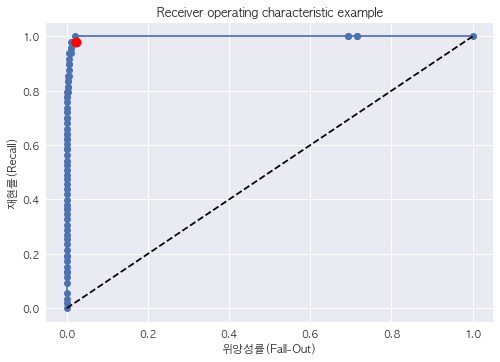

In [55]:
# curve 가 왼쪽 위 모서리에 가깝기 때문에 모델의 성능이 좋다고 평가할 수 있음
# fall-out 이 작고 y=x 그래프보다 상단에 위치해 있기 때문에 성능이 좋다고 평가할 수 있음
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [58]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]

In [62]:
# 그럼에도 threshold 값이 높게 나오긴함 (맞게 계산한 건지 잘 모르겠음)
# optimal cut-off 는 0.9794.. 로 나옴
temp = []
for i in range(len(res)):
    value = abs(res[i][0] - res[i][1])
    temp.append(value)

standard = max(temp) # 새로운 기준 저장
print(max(temp))


0.9794752810994111


In [61]:
# 각 test 데이터의 y 값에 대한 확률을 저장 
probs = LR.predict_proba(x_test)

In [70]:
# optimal cut-off 에 해당하는 새로운 기준으로 y 값 예측
y_temp = []
for prob in probs:
    if prob[1] > standard:
        value = 1
    else:
        value = 0
    y_temp.append(value)

In [88]:
score = 0
for i in range(len(y_temp)):
    if y_temp[i] == y_pred[i]:
        score += 1
    else:
        score += 0

In [93]:
print('optimal cut-off 의 정확도 :',score / len(y_pred))

optimal cut-off 의 정확도 : 0.9194512838550827
